## Some context

 - dataset contains transactions from September 2013 in Europe
 - highly unbalanced
 - features V_1, V_2, ..., V_28 obtained from PCA
 - feature 'Time' = delta of time elapsed from the first transaction

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # using a 3 decimal format
df = pd.read_csv("../creditcard.csv")  # read the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


We can observe that V_1 through V_28 have been scaled

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [4]:
df.isnull().sum().max()

0

In [5]:
df['Class'].value_counts()[1]/len(df)*100

0.1727485630620034

We can already observe some things:

- most transactions are quite small, the mean of 'Amount' is only 88 USD
- no nulls in the dataset
- fraudulent transactions are only about 0.17%

Text(0.5, 1.0, '0: No Fraud || 1: Fraud')

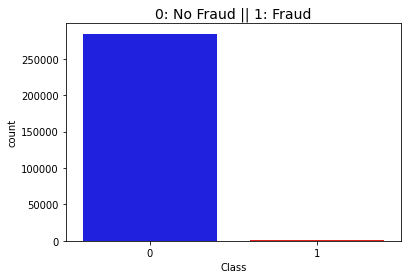

In [6]:
sns.countplot('Class', data=df, palette=['blue', 'red'])
plt.title('0: No Fraud || 1: Fraud', fontsize=14)

(0.0, 172792.0)

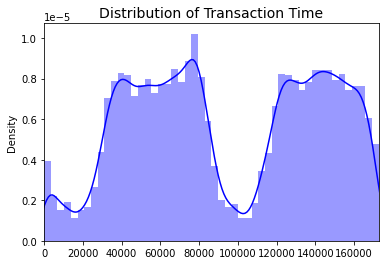

In [7]:
time_val = df['Time'].values
ax = sns.distplot(time_val, color='blue')
ax.set_title('Distribution of Transaction Time', fontsize=14)
ax.set_xlim([min(time_val), max(time_val)])

(0.0, 25691.16)

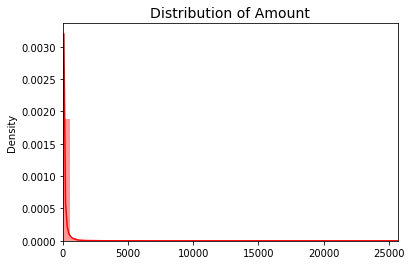

In [8]:
amount_vals = df['Amount'].values
ax = sns.distplot(amount_vals, color='red')
ax.set_title('Distribution of Amount', fontsize=14)
ax.set_xlim([min(amount_vals), max(amount_vals)])

Next steps...

Undersampling the dataset in order to obtain 50/50 distribution because our original dataset will be prone to overfitting

In [9]:
from sklearn.preprocessing import RobustScaler

# we can observe above there are many outliers to the Amount feature

scaler = RobustScaler()
scaled_time = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
scaled_amount = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.insert(0, "scaled_time", scaled_time)
df.insert(1, "scaled_amount", scaled_amount)
df.drop(["Time", "Amount"], axis=1, inplace=True)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.995,1.783,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,...,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0
1,-0.995,-0.270,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,...,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0
2,-0.995,4.984,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,...,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0
3,-0.995,1.418,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,...,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0
4,-0.995,0.671,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,...,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

# because we want to keep the ratio of frauds (0.17%) we are using a special splitting module
sss = StratifiedShuffleSplit(n_splits=5)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values


# check if ratio was kept
train_unique_label, train_count_label = np.unique(y_train, return_counts=True)
test_unique_label, test_count_label = np.unique(y_test, return_counts=True)

print("Train distribution: ", train_count_label/len(y_train))
print("Test distribution: ", test_count_label/len(y_test))

Train distribution:  [0.99827173 0.00172827]
Test distribution:  [0.99827955 0.00172045]


In [11]:
# we shuffle in order to ensure randomness, Time feature might be sensitive to ordering
df = df.sample(frac=1)

df_fraud = df.loc[df["Class"] == 1]
df_no_fraud = df.loc[df["Class"] == 0][:492]

concat_df = pd.concat([df_fraud, df_no_fraud])

new_df = concat_df.sample(frac=1, random_state=1337)  # reshuffle
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
197586,0.557,6.410,-0.361,1.133,-2.971,-0.283,0.371,-0.575,4.032,-0.934,...,-0.026,0.111,0.564,-0.408,-0.880,1.408,-0.137,-0.001,-0.183,1
16897,-0.663,0.098,1.314,-0.796,0.635,-0.978,-0.841,0.549,-1.166,0.240,...,0.163,0.423,1.164,-0.209,-0.751,0.445,0.011,0.049,0.008,0
245556,0.800,4.694,1.323,-0.844,-2.097,0.760,-0.196,-1.166,0.483,-0.350,...,0.585,0.134,-0.122,-0.209,-0.255,-0.098,-0.614,0.003,0.072,1
81609,-0.302,19.109,-2.327,-3.348,-3.513,3.175,-2.815,-0.203,-0.892,0.333,...,3.209,1.227,-0.696,-1.478,-0.062,0.236,0.532,0.302,0.536,1
42473,-0.512,-0.254,-3.601,4.519,-6.341,6.215,-5.830,-2.478,-9.938,2.830,...,1.385,2.264,0.621,-0.094,0.537,0.398,0.008,2.054,0.836,1


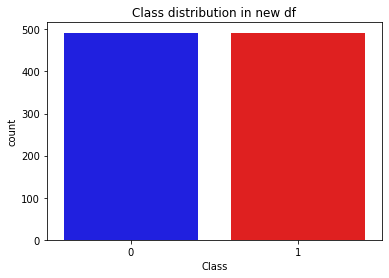

In [14]:
sns.countplot("Class", data=new_df, palette=["blue", "red"])
plt.title("Class distribution in new df")
plt.show()

Next, we are going to look at correlation matrices to analyze which features

In [ ]:
# corr mat for initial df

corr = df.corr()
sns.heatmap(corr)